In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets list -s tomato # to list datasets contains tomato

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
noulam/tomato                                                      Tomato                                             743MB  2019-07-10 10:48:38          18993        280  0.4375           
ramkrijal/tomato-daily-prices                                      Tomato Daily Prices                                 10KB  2023-03-10 15:39:14           3302         68  1.0              
ashishmotwani/tomato                                               Tomato Leaves Dataset                                1GB  2022-10-25 11:58:27           5481         95  0.875            
andrewmvd/tomato-detection                        

In [4]:
# when google colab session is closed, data is lost which is downloaded from kaggle.
#So would like to upload images to google drive from kaggle.
from google.colab import drive

# Use drive._mount() instead of drive.mount()
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:03<00:00, 23.7MB/s]
100% 2.70G/2.70G [02:03<00:00, 23.4MB/s]


In [6]:
# This will unzip the zip file and push the files to mydrive in google drive
!unzip new-plant-diseases-dataset.zip -d /content/drive/My\ Drive/Datasets/tomato_plant_disease/
!unzip new-plant-diseases-dataset.zip #to unzip in colab itself

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [9]:
train = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [7]:
train_dir = '/content/drive/My Drive/Datasets/plant_disease/train/'
validation_dir = '/content/drive/My Drive/Datasets/plant_disease/valid/'

In [10]:
import os
# Filter subfolders that contain "tomato" in their names ## to consider only tomato plat disease images only
filtered_classes = [
    folder for folder in os.listdir(train_dir)
    if os.path.isdir(os.path.join(train_dir, folder)) and "tomato" in folder.lower()
]

print("Filtered Classes:", filtered_classes)

Filtered Classes: ['Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Tomato___healthy', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Late_blight']


In [46]:
import os
# Filter subfolders that contain "tomato" in their names ## to consider only tomato plat disease images only
filtered_classes = [
    folder for folder in os.listdir(train_dir)
    if os.path.isdir(os.path.join(train_dir, folder)) and "tomato" in folder.lower()
]

print("Filtered Classes:", filtered_classes)

Filtered Classes: ['Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Tomato___healthy', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Late_blight']


In [19]:
train = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [15]:
# Load testing dataset
import tensorflow as tf


validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode='categorical',
    class_names=filtered_classes
)

Found 4585 files belonging to 10 classes.


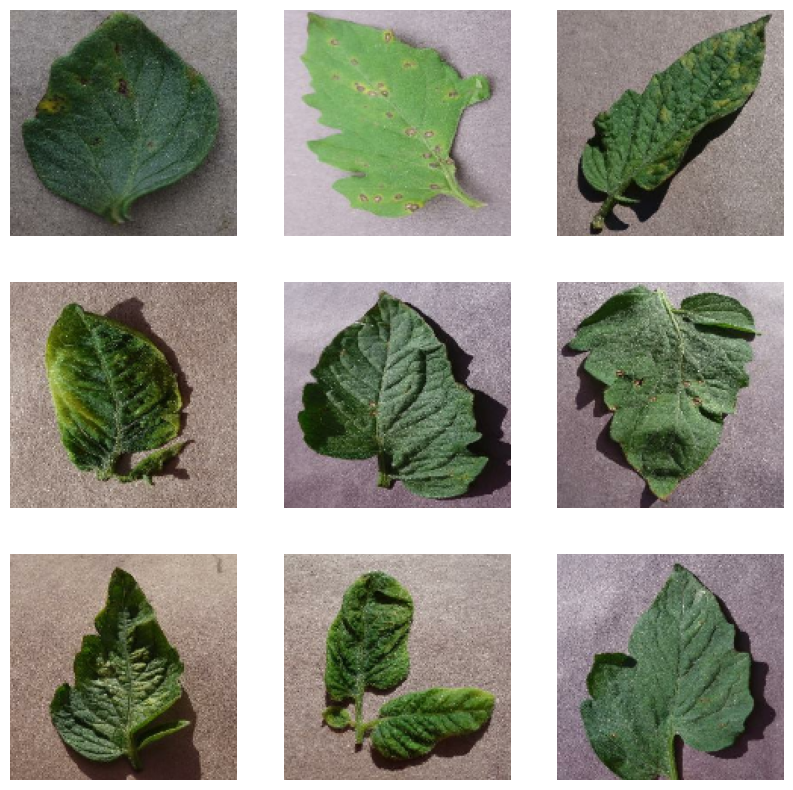

In [48]:
import matplotlib.pyplot as plt

for images, labels in train_dataset.take(1):
    #augmented_images = data_augmentation(images)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        #plt.imshow((augmented_images[i] * 255.0).numpy().astype("uint8"))
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

Found 18345 files belonging to 10 classes.


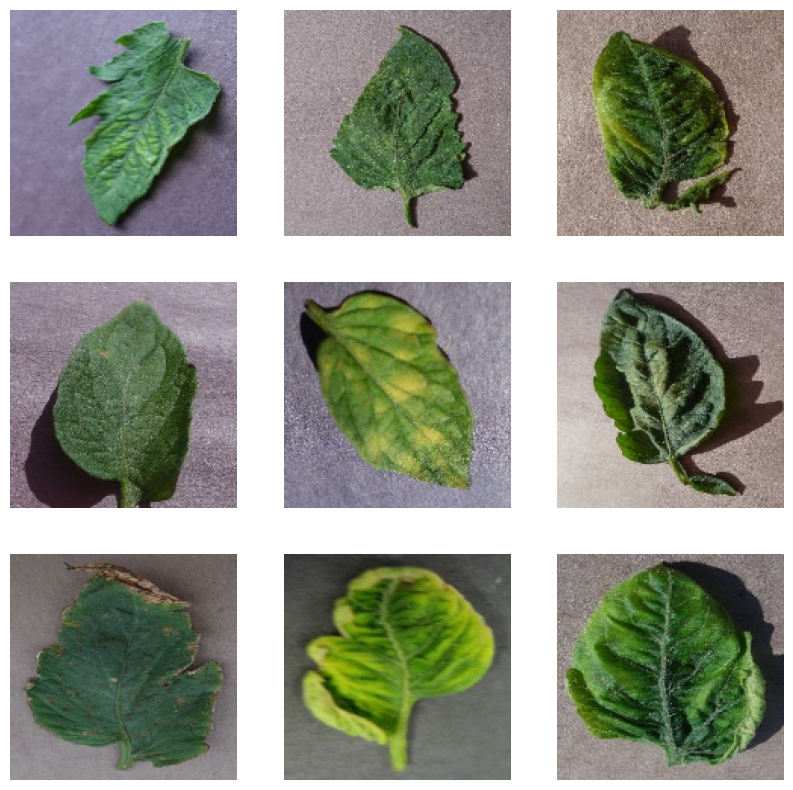

In [22]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming 'train_dir' is the path to your training data
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,  # Use train_dir instead of train
    image_size=(150, 150),
    batch_size=32,
    label_mode='categorical',
    # If class_names are different for train, update accordingly
    class_names=filtered_classes
)

for images, labels in train_dataset.take(1):  # Use train_dataset
    #augmented_images = data_augmentation(images)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        #plt.imshow((augmented_images[i] * 255.0).numpy().astype("uint8"))
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [23]:
# Define the data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1.0 / 255.0)  # Normalize pixel values
    ,tf.keras.layers.RandomRotation(0.1),  # Equivalent to rotation_range=30
    tf.keras.layers.RandomWidth(0.2),  # Equivalent to width_shift_range=0.2
    tf.keras.layers.RandomHeight(0.2),  # Equivalent to height_shift_range=0.2
    tf.keras.layers.RandomZoom(0.2),  # Equivalent to zoom_range=0.2
    tf.keras.layers.RandomFlip("horizontal")  # Equivalent to horizontal_flip
])

In [24]:
val_dataset = validation_dataset.map(lambda x, y: (tf.keras.layers.Rescaling(1.0 / 255.0)(x), y))

In [25]:
resnetmodel = tf.keras.applications.ResNet50V2(include_top=False,input_shape=(150,150,3),weights = 'imagenet')
# Freeze the base model layers
for layers in resnetmodel.layers:
  layers.trainable = False

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,GlobalAveragePooling2D,Dropout


model = Sequential()

model.add(resnetmodel)
model.add(Flatten())
model.add(Dense(256,activation='relu'))

# Assuming you have 10 classes based on the target shape (None, 10)
# model.add(Dense(10, activation='softmax')) # Add a final layer with 10 neurons and softmax activation

In [39]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ (None, 5, 5, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │      13,107,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,674,826 (139.90 MB)

 Trainable params: 13,110,026 (50.01 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [40]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [41]:
history = model.fit(train_dataset,epochs=2,validation_data=val_dataset)

Epoch 1/2
574/574 ━━━━━━━━━━━━━━━━━━━━ 47s 67ms/step - accuracy: 0.4156 - loss: 22.9922 - val_accuracy: 0.1019 - val_loss: 4.3286
Epoch 2/2
574/574 ━━━━━━━━━━━━━━━━━━━━ 34s 59ms/step - accuracy: 0.6351 - loss: 7.0176 - val_accuracy: 0.1029 - val_loss: 4.3313


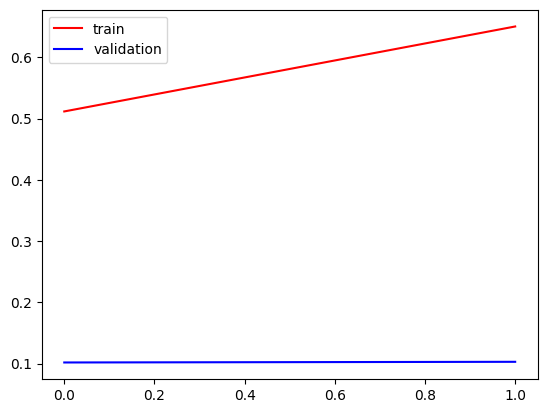

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

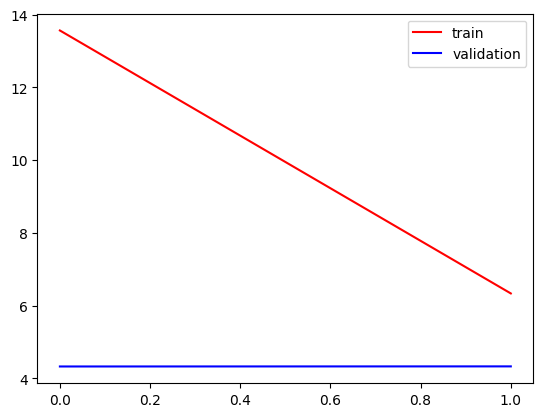

In [43]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [45]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Specify the image path
img_path = '/content/test/test/TomatoEarlyBlight2.JPG'  # Change this to the actual path

# Load the image and resize it to 150x150 (matching your model input size)
img = image.load_img(img_path, target_size=(150, 150))

# Convert the image to an array
img_array = image.img_to_array(img)

# Normalize pixel values to [0, 1]
img_array /= 255.0

# Add a batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Predict the class of the image
predictions = model.predict(img_array)

# Get the index of the highest predicted probability
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Use the class names from the dataset
predicted_class_label = train[predicted_class_index]

# Print the predicted class and probability
print("Predicted Class:", predicted_class_label)
print("Predicted Class Probability:", predictions[0][predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: N
Predicted Class Probability: 0.6236648


In [51]:
s=model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [55]:
from sklearn.metrics import accuracy_score



accuracy_score=accuracy_score(train,val_dataset)
print(accuracy_score)

InvalidParameterError: The 'y_true' parameter of accuracy_score must be an array-like or a sparse matrix. Got '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train' instead.

In [56]:
from sklearn.metrics import accuracy_score
import numpy as np

# Get predictions for the validation dataset
y_pred = model.predict(val_dataset)
y_pred = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Extract true labels from the validation dataset
y_true = np.concatenate([y for x, y in val_dataset], axis=0)
y_true = np.argmax(y_true, axis=1)  # Convert one-hot encoded labels to class labels

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(accuracy)

144/144 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step
0.09749182115594329
